# Aquaculture Exports in NEA region

We want to answer the following questions for the north-east Atlantic (NEA) region:
1. What are the main species of aquaculture production?
2. For these species, what is the relative share of aquaculture production compared to wild capture?

In [3]:
import xarray as xr

In [4]:
exports = xr.open_dataset("data/economic/exports/exports_nea_countries.nc")
production = xr.open_dataset("data/economic/production/fao_fish_production.nc")

In absolute number, the most important aquaculture species:

species
Salmon                1.485336e+06
Mussel Mytilus spp    3.848451e+05
Trout                 2.062870e+05
Oyster                9.975607e+04
Seabass, European     2.005932e+04
Name: average_live_weight, dtype: float64


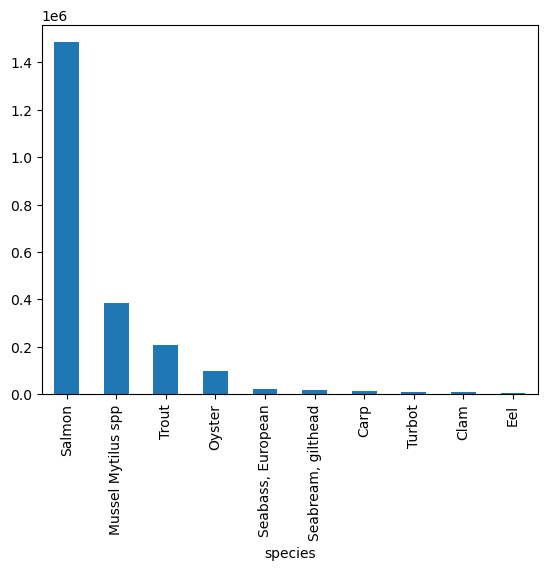

In [14]:
df = production["average_live_weight"].sel(production_type="aqua").sum(["country"]).to_series().sort_values(ascending=False)
df.iloc[:10].plot.bar(x="species")

In relative terms, Salmon is the most important species (65 % of all aquaculture products), followed by Mussels/Oysters (21 %) and Trout (9%).


In [20]:
(df / df.sum()).head(6).round(2)

species
Salmon                0.65
Mussel Mytilus spp    0.17
Trout                 0.09
Oyster                0.04
Seabass, European     0.01
Seabream, gilthead    0.01
Name: average_live_weight, dtype: float64

What is the relative share aquaculture vs. wild capture for these species?

In [43]:
def get_weighted_rel_share(species):
    relative_share = production["relative_share"].sel(production_type="aqua").sel(species=species)
    total_production = production["average_live_weight"].sel(production_type="aqua").sel(species=species).fillna(0)
    return relative_share.weighted(total_production).mean().item()


print("Salmon", get_weighted_rel_share(["Salmon"]))
print("Mussels/Oysters", get_weighted_rel_share(["Mussel Mytilus spp", "Oyster"]))
print("Trout", get_weighted_rel_share(["Trout"]))

Salmon 0.9993779190195813
Mussels/Oysters 0.975764972373054
Trout 0.9839136477780758
